# Algoritmo Del Vendedor Viajero - Proyecto II 


## 1. Pregunta De Investigación 

¿Cómo se compara el desempeño del algoritmo simulated annealing con el desempeño del algoritmo genético en la resolución del problema del vendedor viajero para 17 localidades en Costa Rica?

## 2. Preguntas Secundarias  De Investigación

- ¿Cuál es la configuración de parámetros recomendada para resolver el
  problema con el algoritmo simulated annealing? ¿Por qué?
  
  
- ¿Cuál es la configuración de parámetros recomendada para resolver el
  problema con el algoritmo genético? ¿Por qué?

## 3. Problema

El problema del vendedor  viajero se trata de  crear un algoritmo que busque la ruta mas optima  entre n cantidades de ciudades visitando cada ciudad  exactamente una vez  y finalizando la ruta en la ciudad  donde comenzo. Se utilizaran dos metodos de algoritmos diferentes , el primero será un algoritmo de simulated annealing y el segundo un algoritmo genético. 

### Alcances  y Delimitaciones

Los algoritmos de  simulated  annnealing y genetico utilizan un estilo similar la idea  de estos algoritmos es comenzar  con dos o mas  soluciones al azar  y ir comparando y modificando estas  soluciones con base a su rendimiento, para  asi al final encontrar una solucion optima. Esto permite que apesar  de comenzar con soluciones  al azar estos algoritmos nos dan soluciones optimas que funcionan de muy buena manera. Estos algoritmos utilizan bastantes recursos, pero nos permiten encontrar soluciones que resuelven problemas complicados que de otra manera se nos dificultarían mas. 

### Hipótesis

El algoritmo genético genera una solución más óptima en cuanto a distancia recorrida se refiere, debido a sus raíces provenientes del darwinismo o selección natural, en donde se inicia considerando un gran grupo de posibles resultados y se van generando diversas filtraciones, eliminando todo aquello que pareciera no cumplir con un buen rendimiento; sin embargo, esto genera que su tiempo de ejecución sea mayor en comparación a su contrincante, por lo que, si el tiempo no representa un problema, este será la opción conveniente, pero si lo que queremos es generar un camino a mayor velocidad de procesador, simulated annealing es el ganador. 

## 4. Metodología

Para comparar el algoritmo genetico y simulated annealing vamos a utilizar  el csv con 17 ciudades, se procesara con las funciones DominioAGTSP(Csv,Ciudad)  para generar una matriz en el algoritmo genetico, donde su primer parametro es la ruta del archivo csv y su segundo parametro es el nombre de la ciudad inicial, y DominioTSP para la matriz de simulated annealing que tiene los mismos parametros. 

Se ejecutaran los algoritmos 17 veces(Cantidad_de_iteraciones) con cada una de las ciudades que se encuentran en el archivo. Primeramente se haran pruebas con respecto al costo total del resultado(ruta).Usaremos la funcion fcosto(x)(que recibe como parametro el resultado del algoritmo) para determinar el costo de cada solucion. Luego se introduciran esos costos en una tabla utilizando la biblioteca prettytable para visualizar de manera sencilla cual algoritmo es mas eficiente.

Despues se haran de nuevo las pruebas pero esta vez con respecto al tiempo de ejecucion de los algoritmos. Para calcular el tiempo de ejecucion de cada algoritmo se hara uso de la funcion time.process_time() con el fin de saber el tiempo de ejecucion del programa hasta el momento. Se ejecutara la funcion y se guardara el resultado antes y despues de correr el algoritmo correspondiente para posteriormente restar los tiempos y asi calcular el tiempo de ejecucion del algoritmo. Despues se introduciran los tiempos de ejecucion en una tabla para comparar de manera sencilla los tiempos de ambos algoritmos.

## 5. Propuesta De Experimentos

Especificaciones promedio para TODOS los experimentos propuestos debido a que todos se evaluaran con la función Big_O:

Para su obtener resultados lo más acercados a lo propuesto se necesita una maquina: HP con 8gb de RAM, 1 TERA de almacenamiento en disco, y un procesador AMD Ryzen 3

- Contar con una distribución de linux de la rama Debian, como S.O.
- Contar con la versión de Python 3.8
- Contar con Pip instalado previamente
- Descargar la versión más reciente de la biblioteca big_o con:

In [1]:
pip install big-O

  Using cached https://files.pythonhosted.org/packages/a6/fc/36e52d0ae2aa502b211f1bcd2fdeec72d343d58224eabcdddc1bcb052db1/numpy-1.19.4-cp36-cp36m-manylinux1_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U prettytable

  Using cached https://files.pythonhosted.org/packages/94/d5/52e48f3bcf66f838d411ad85c3ac9550c2451d082623e2d4d4df7411ed5c/prettytable-2.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3d/f2/1489d3b6c72d68bf79cd0fba6b6c7497df4ebf7d40970e2d7eceb8d0ea9c/setuptools-51.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/59/7c/e39aca596badaf1b78e8f547c807b04dae603a433d3e7a7e04d67f2ef3e5/wcwidth-0.2.5-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pylab-sdk

  Using cached https://files.pythonhosted.org/packages/ed/67/9a73c2b0144314da579e8c61ab8beaff55905d68caed86e5de2460505329/pylab_sdk-1.3.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -U matplotlib

  Using cached https://files.pythonhosted.org/packages/d2/43/2bd63467490036697e7be71444fafc7b236923d614d4521979a200c6b559/matplotlib-3.3.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a6/fc/36e52d0ae2aa502b211f1bcd2fdeec72d343d58224eabcdddc1bcb052db1/numpy-1.19.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5f/19/d4c25111d36163698396f93c363114cf1cddbacb24744f6612f25b6aa3d0/Pillow-8.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cac

In [5]:
pip install requests

  Using cached https://files.pythonhosted.org/packages/39/fc/f91eac5a39a65f75a7adb58eac7fa78871ea9872283fb9c44e6545998134/requests-2.25.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f5/71/45d36a8df68f3ebb098d6861b2c017f3d094538c0fb98fa61d4dc43e69b9/urllib3-1.26.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5e/a0/5f06e1e1d463903cf0c0eebeb751791119ed7a4b3737fdc9a77f1cdfb51f/certifi-2020.12.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


### Competencia en costos

+------------------------+--------------------+--------------------+---------------------+
|    Ciudad de Inicio    |   Costo Genetico   |     Costo S.A      |      Diferencia     |
+------------------------+--------------------+--------------------+---------------------+
|        Liberia         | 1818.5000000000002 |       3600.5       | -1781.9999999999998 |
|       Santa Cruz       |       1781.5       |       3887.6       |       -2106.1       |
|         Nicoya         |       1807.1       | 3906.6000000000004 | -2099.5000000000005 |
|     Ciudad Quesada     | 1651.1000000000001 |       3495.0       | -1843.8999999999999 |
|        Alajuela        |       1819.4       |       3641.9       |       -1822.5       |
|        Heredia         |       1806.1       |       3682.8       | -1876.7000000000003 |
| Puerto Viejo Sarapiqui | 1859.1000000000001 | 3339.1000000000004 | -1480.0000000000002 |
|        San Jose        | 1930.1999999999998 |       2951.4       | -1021.2000000000003 |

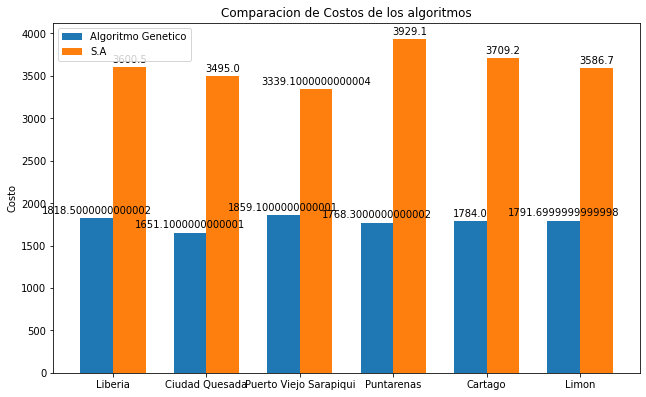

In [6]:
import big_o
from big_o import complexities as cmpl
from prettytable import PrettyTable
from pylab import *
from algoritmo_genetico import optimizar as oag
from dominio_ag_tsp import DominioAGTSP

from simulated_annealing import optimizar as osa
from dominio_tsp import DominioTSP
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
CANTIDAD_DE_ITERACIONES = 17

#PRUEBAS EN COSTO

dominioAG = DominioAGTSP('datos/ciudades_cr.csv', 'Cartago')

#Tabla
tabla = PrettyTable(['Ciudad de Inicio', 'Costo Genetico', 'Costo S.A ', 'Diferencia'])



ciudades = []
costo_genetico = []
costo_sa = []

for i in range(0, CANTIDAD_DE_ITERACIONES):
    ciudad = dominioAG.cities[i]
    dominioAG = DominioAGTSP('datos/ciudades_cr.csv', ciudad)
    solAG = oag(dominioAG, 100, 0.1, 0.5, 1000)
    

    #Cargaremos los dominios para el S.A
    dominioSP = DominioTSP('datos/ciudades_cr.csv', ciudad)
    solSP = osa(dominioSP)
    
    costoAGMejorSolucion = dominioAG.fcosto(solAG)
    costoSPMejorSolucion = dominioSP.fcosto(solSP)
    if i%3 == 0:
        costo_genetico.append(costoAGMejorSolucion)
        costo_sa.append(costoSPMejorSolucion)
        ciudades.append(ciudad)
    tabla.add_row([ciudad,str(costoAGMejorSolucion),str(costoSPMejorSolucion),str(costoAGMejorSolucion-costoSPMejorSolucion)])
    #AÑADIR A TABLA E IMPRIMIR TABLA
    
print(tabla)

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(ciudades))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()



rects1 = ax.bar(x - width/2, costo_genetico, width, label='Algoritmo Genetico')

rects2 = ax.bar(x + width/2, costo_sa, width, label='S.A')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Costo')
ax.set_title('Comparacion de Costos de los algoritmos')
ax.set_xticks(x)
ax.set_xticklabels(ciudades)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.set_size_inches(10, 6)
plt.savefig('doble_barra.png')
#Mostramos la grafica con el metodo show()
plt.show()


### Competencia en Tiempos

+------------------------+---------------------------+----------------------+--------------------+
|    Ciudad de Inicio    | Tiempo algoritmo genetico |      Tiempo S.A      |     Diferencia     |
+------------------------+---------------------------+----------------------+--------------------+
|        Liberia         |     3.1265438689999883    | 0.03473054799997044  | 3.091813321000018  |
|       Santa Cruz       |     3.117299543999991     | 0.029444492999971317 | 3.0878550510000196 |
|         Nicoya         |     3.0946150120000198    | 0.030123778000017865 | 3.064491234000002  |
|     Ciudad Quesada     |     3.0644178459999694    | 0.03186864700001024  | 3.032549198999959  |
|        Alajuela        |     3.2262156639999944    | 0.031475978000003124 | 3.1947396859999913 |
|        Heredia         |     3.0648596500000167    | 0.030569388000003528 | 3.034290262000013  |
| Puerto Viejo Sarapiqui |     3.0447299089999547    |  0.0389409190000265  | 3.005788989999928  |
|        S

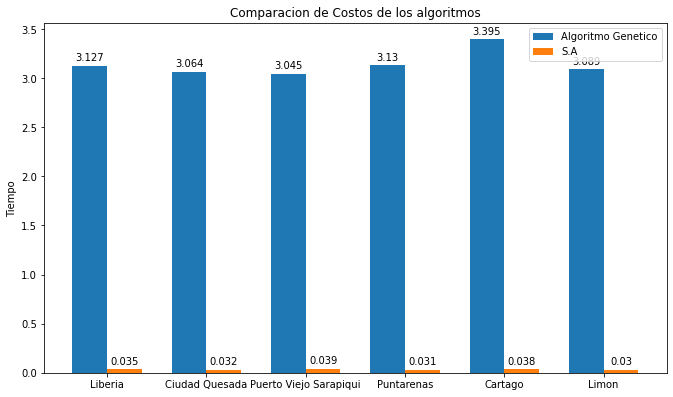

In [12]:
import time

#Añadir A tabla
CANTIDAD_DE_ITERACIONES = 17

#Tabla
tabla = PrettyTable(['Ciudad de Inicio', 'Tiempo algoritmo genetico', 'Tiempo S.A', 'Diferencia'])
ciudades = []
tiempo_genetico = []
tiempo_sa = []

for i in range(0, CANTIDAD_DE_ITERACIONES):
    
    ciudad = dominioAG.cities[i]
    dominioAG = DominioAGTSP('datos/ciudades_cr.csv', ciudad)
    #Cargaremos los dominios para el S.A
    dominioSP = DominioTSP('datos/ciudades_cr.csv', ciudad)
    
    
    inicioAG = time.process_time()
    x = oag(dominioAG, 100, 0.1, 0.5, 1000)
    deltaAG = time.process_time() - inicioAG 
    inicioSA = time.process_time()
    y = osa(dominioSP)
    deltaSA = time.process_time() - inicioSA
    if i%3 == 0:
        tiempo_genetico.append(round(deltaAG,3))
        tiempo_sa.append(round(deltaSA,3))
        ciudades.append(ciudad)
    tabla.add_row([ciudad,str(deltaAG),str(deltaSA),str(deltaAG-deltaSA)])
print(tabla)



x = np.arange(len(ciudades))

width = 0.35

fig, ax = plt.subplots()



rects1 = ax.bar(x - width/2, tiempo_genetico, width, label='Algoritmo Genetico')

rects2 = ax.bar(x + width/2, tiempo_sa, width, label='S.A')


ax.set_ylabel('Tiempo')
ax.set_title('Comparacion de Costos de los algoritmos')
ax.set_xticks(x)
ax.set_xticklabels(ciudades)

ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.set_size_inches(10, 6)
plt.savefig('doble_barra.png')

plt.show()

## 6. Conclusiones

## 7. Referencias 